#Image Classification using crawled data and VGG-16 


### Steps 1- Dataset Creation:

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("Kate Middleton", limit=5,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/DonaldTrump


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/Gew6l0Nwq8U/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://images.mid-day.com/images/images/2017/jun/donaldtrump-dt-l.jpg
[Error]Invalid image, not saving https://images.mid-day.com/images/images/2017/jun/donaldtrump-dt-l.jpg

[!] Issue getting: https://images.mid-day.com/images/images/2017/jun/donaldtrump-dt-l.jpg
[!] Error:: Invalid image, not saving https://images.mid-day.com/images/images/2017/jun/donaldtrump-dt-l.jpg

[%] Downloading Image #2 from https://ichef.bbci.co.uk/news/624/cpsprodpb/111EE/production/_110462107_donaldtrump.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://somosemprendedores.com/wp-content/uploads/2012/11/frases-de-negocios-motivaciones-067.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.redd.it/0m9n7ewozf751.png
[%] File Downloade

In [ ]:
downloader.download("Meghan Markle", limit=5,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/chicken


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.healitall.com/wp-content/uploads/2018/06/chicken.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-axqzmsLoeaQ/T9xWq0rq-PI/AAAAAAAACac/gvzI0AfHqaE/s1600/Chicken.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.wallpapersdsc.net/wp-content/uploads/2016/10/Chicken-Photos.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-GAKG_FBKO3w/TV5p-40EZzI/AAAAAAAAAxc/T-5sy8fWuwE/s1600/chicken.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://images.freeimages.com/images/previews/7b0/chickens-1328963.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/-5z9R4wA36-c/T9hw1u5xnfI/AAAAAAAACM4/oRGlrkxdiYY/s1600/chicken.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://4.bp.blogspot.com/-bp8yDrPZ-iE/TV5qCkJxz4I/AAAAAAA

### Steps 2- Pre-Processing:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense

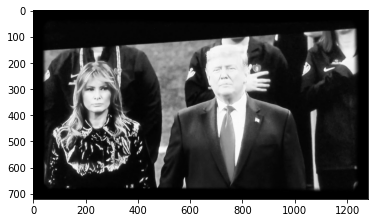

In [ ]:
datadir ="images"
categories =['DonaldTrump']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

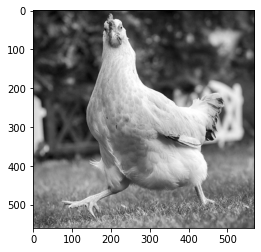

In [ ]:
datadir ="images"
categories =['chicken']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [ ]:
datadir = "images"
categories = ['peacock', 'whitepeacock']

In [ ]:
data = []
img_size=500

def preprocess():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            num_array = cv2.resize(img_array,(img_size, img_size))
            
            data.append([num_array, class_num])
            
preprocess()

In [ ]:
print(len(data))

20


### Steps 3- Dataset Preparation:

In [ ]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.asarray(X).reshape(-1,img_size,img_size,1)
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print("Shape of the following:")
print("X_train =", X_train.shape, "\nX_test =", X_test.shape, "\ny_train =", y_train.shape, "\ny_test =", y_test.shape)

Shape of the following:
X_train = (15, 500, 500, 1) 
X_test = (5, 500, 500, 1) 
y_train = (15,) 
y_test = (5,)


### Step 4 - Model Creation:

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4620 - binary_accuracy: 0.5327 - val_loss: 0.5757 - val_binary_accuracy: 0.4001
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.4618 - binary_accuracy: 0.5327 - val_loss: 0.5750 - val_binary_accuracy: 0.4001
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.4616 - binary_accuracy: 0.5327 - val_loss: 0.5744 - val_binary_accuracy: 0.4001
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.4615 - binary_accuracy: 0.5327 - val_loss: 0.5739 - val_binary_accuracy: 0.4001
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.4614 - binary_accuracy: 0.5327 - val_loss: 0.5733 - val_binary_accuracy: 0.4001
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.4612 - binary_accuracy: 0.5327 - val_loss: 0.5728 - val_binary_accuracy: 0.4001
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.4611 - binary_ac

In [ ]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 1s 549ms/step - loss: 0.2533 - binary_accuracy: 0.5238


[0.25330647826194763, 0.5237506031990051]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Step 5 - Performance Analysis:

#### a. Single layer neural network Performance Analysis

In [ ]:
def performance_analysis(datadir, categories, img_size, nodes):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(0, 5)), 
                              columns = ['Img size','Nodes Number','Accuracy','Loss','Training time'])
 
    training_data = []
    
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])

    X=[]
    y=[]
    
    for features,label in training_data:
        X.append(features)
        y.append(label)
        
    X=np.asarray(X).reshape(-1,img_size,img_size,1)
    y=np.asarray(y)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

    count = 0
    t_start = process_time() 
    
    model = Sequential()
    model.add(Dense(nodes, input_dim=1, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
    
    t_stop = process_time() 
    t_elapsed = t_stop - t_start
    
    score = model.evaluate(X_test,y_test)
    
    count+=1

    df_results.loc[count,'Img size'] = img_size
    df_results.loc[count,'Nodes Number'] = nodes
    df_results.loc[count,'Accuracy'] = score[1]
    df_results.loc[count,'Loss'] = score[0]
    df_results.loc[count,'Training time'] = t_elapsed
        
    return df_results

In [ ]:
def evaluation():
    m1 = performance_analysis("images", ['peacock', 'whitepeacock'], 500, 8)
    m2 = performance_analysis("images", ['peacock', 'whitepeacock'], 500, 16)
    m3 = performance_analysis("images", ['peacock', 'whitepeacock'],500, 32)
    m4 = performance_analysis("images", ['peacock', 'whitepeacock'],500, 64)
    m5 = performance_analysis("images", ['peacock', 'whitepeacock'], 100, 8)
    m6 = performance_analysis("images", ['peacock', 'whitepeacock'],100, 16)
    m7 = performance_analysis("images", ['peacock', 'whitepeacock'], 100, 32)
    m8 = performance_analysis("images", ['peacock', 'whitepeacock'],100, 64)
    m9 = performance_analysis("images", ['peacock', 'whitepeacock'], 50, 8)
    m10 = performance_analysis("images", ['peacock', 'whitepeacock'],50, 16)
    m11 = performance_analysis("images", ['peacock', 'whitepeacock'],50, 32)
    m12 = performance_analysis("images", ['peacock', 'whitepeacock'], 50, 64)
    m13 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 8)
    m14 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 16)
    m15 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 32)
    m16 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 64)
    m17 = performance_analysis("images", ['peacock', 'whitepeacock'], 10, 8)
    m18 = performance_analysis("images", ['peacock', 'whitepeacock'],10, 16)
    m19 = performance_analysis("images", ['peacock', 'whitepeacock'], 10, 32)
    m20 = performance_analysis("images", ['peacock', 'whitepeacock'],10, 64)
    
    df = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20], axis=0)

    return df 

In [ ]:
evaluation()

Epoch 1/10


1/1 [==============================] - ETA: 0s - loss: 0.5298 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_50_input'), name='dense_50_input', description="created by layer 'dense_50_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 2s 2s/step - loss: 0.5298 - binary_accuracy: 0.4667 - val_loss: 0.3931 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.5298 - binary_accuracy: 0.4673 - val_loss: 0.3931 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.5297 - binary_accuracy: 0.4673 - val_loss: 0.3930 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.5297 - binary_accuracy: 0.4673 - val_loss: 0.3929 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.5297 - binary_accuracy: 0.4673 - val_loss: 0.3929 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.5297 - binary_accuracy: 0.4673 - val_loss: 0.3928 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.5297 - binary_accuracy: 0.4673 - v

1/1 [==============================] - ETA: 0s - loss: 0.5278 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_52_input'), name='dense_52_input', description="created by layer 'dense_52_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 2s 2s/step - loss: 0.5278 - binary_accuracy: 0.4667 - val_loss: 0.3868 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.5276 - binary_accuracy: 0.4673 - val_loss: 0.3865 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.5274 - binary_accuracy: 0.4673 - val_loss: 0.3861 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.5272 - binary_accuracy: 0.4673 - val_loss: 0.3858 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.5270 - binary_accuracy: 0.4673 - val_loss: 0.3854 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.5268 - binary_accuracy: 0.4673 - val_loss: 0.3851 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.5266 - binary_accuracy: 0.4673 - v

1/1 [==============================] - ETA: 0s - loss: 0.5245 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_54_input'), name='dense_54_input', description="created by layer 'dense_54_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 2s 2s/step - loss: 0.5245 - binary_accuracy: 0.4667 - val_loss: 0.3808 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.5236 - binary_accuracy: 0.4673 - val_loss: 0.3797 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.5227 - binary_accuracy: 0.4673 - val_loss: 0.3786 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.5217 - binary_accuracy: 0.4673 - val_loss: 0.3775 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.5206 - binary_accuracy: 0.4673 - val_loss: 0.3762 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5193 - binary_accuracy: 0.4673 - val_loss: 0.3748 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5176 - binary_accuracy: 0.4673 - v

1/1 [==============================] - ETA: 0s - loss: 0.4416 - binary_accuracy: 0.5327WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_56_input'), name='dense_56_input', description="created by layer 'dense_56_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 3s 3s/step - loss: 0.4416 - binary_accuracy: 0.5327 - val_loss: 0.5104 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.4216 - binary_accuracy: 0.5327 - val_loss: 0.4480 - val_binary_accuracy: 0.4020
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.3684 - binary_accuracy: 0.5326 - val_loss: 0.2467 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.2517 - binary_accuracy: 0.4667 - val_loss: 0.3850 - val_binary_accuracy: 0.4070
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.3199 - binary_accuracy: 0.5326 - val_loss: 0.2510 - val_binary_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.2922 - binary_accuracy: 0.4667 - val_loss: 0.3754 - val_binary_accuracy: 0.4070
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.3130 - binary_accuracy: 0.5326 - v

1/1 [==============================] - ETA: 0s - loss: 0.5254 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_58_input'), name='dense_58_input', description="created by layer 'dense_58_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 828ms/step - loss: 0.5254 - binary_accuracy: 0.4667 - val_loss: 0.3822 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 84ms/step - loss: 0.5248 - binary_accuracy: 0.4673 - val_loss: 0.3814 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 111ms/step - loss: 0.5242 - binary_accuracy: 0.4673 - val_loss: 0.3807 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 117ms/step - loss: 0.5236 - binary_accuracy: 0.4673 - val_loss: 0.3800 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 121ms/step - loss: 0.5230 - binary_accuracy: 0.4673 - val_loss: 0.3792 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 118ms/step - loss: 0.5223 - binary_accuracy: 0.4673 - val_loss: 0.3784 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 0s 120ms/step - loss: 0.5216 - binary_

1/1 [==============================] - ETA: 0s - loss: 0.4637 - binary_accuracy: 0.5327WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_60_input'), name='dense_60_input', description="created by layer 'dense_60_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 1s/step - loss: 0.4637 - binary_accuracy: 0.5327 - val_loss: 0.5859 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 89ms/step - loss: 0.4637 - binary_accuracy: 0.5327 - val_loss: 0.5855 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 89ms/step - loss: 0.4636 - binary_accuracy: 0.5327 - val_loss: 0.5852 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 91ms/step - loss: 0.4636 - binary_accuracy: 0.5327 - val_loss: 0.5849 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 87ms/step - loss: 0.4635 - binary_accuracy: 0.5327 - val_loss: 0.5846 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 89ms/step - loss: 0.4635 - binary_accuracy: 0.5327 - val_loss: 0.5844 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 94ms/step - loss: 0.4635 - binary_accuracy

1/1 [==============================] - ETA: 0s - loss: 0.5220 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_62_input'), name='dense_62_input', description="created by layer 'dense_62_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 822ms/step - loss: 0.5220 - binary_accuracy: 0.4667 - val_loss: 0.3766 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 105ms/step - loss: 0.5198 - binary_accuracy: 0.4673 - val_loss: 0.3742 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 98ms/step - loss: 0.5170 - binary_accuracy: 0.4673 - val_loss: 0.3711 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 125ms/step - loss: 0.5130 - binary_accuracy: 0.4673 - val_loss: 0.3668 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 97ms/step - loss: 0.5066 - binary_accuracy: 0.4673 - val_loss: 0.3600 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 125ms/step - loss: 0.4951 - binary_accuracy: 0.4673 - val_loss: 0.3474 - val_binary_accuracy: 0.5984
Epoch 7/10
1/1 [==============================] - 0s 105ms/step - loss: 0.4713 - binary_a

1/1 [==============================] - ETA: 0s - loss: 0.4489 - binary_accuracy: 0.5327WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_64_input'), name='dense_64_input', description="created by layer 'dense_64_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 850ms/step - loss: 0.4489 - binary_accuracy: 0.5327 - val_loss: 0.5236 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 138ms/step - loss: 0.4330 - binary_accuracy: 0.5327 - val_loss: 0.4589 - val_binary_accuracy: 0.4016
Epoch 3/10
1/1 [==============================] - 0s 136ms/step - loss: 0.3775 - binary_accuracy: 0.5327 - val_loss: 0.2533 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 133ms/step - loss: 0.2977 - binary_accuracy: 0.4667 - val_loss: 0.4545 - val_binary_accuracy: 0.4016
Epoch 5/10
1/1 [==============================] - 0s 144ms/step - loss: 0.3739 - binary_accuracy: 0.5327 - val_loss: 0.3751 - val_binary_accuracy: 0.4099
Epoch 6/10
1/1 [==============================] - 0s 133ms/step - loss: 0.3129 - binary_accuracy: 0.5325 - val_loss: 0.2503 - val_binary_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 140ms/step - loss: 0.2911 - binary

1/1 [==============================] - ETA: 0s - loss: 0.5253 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_66_input'), name='dense_66_input', description="created by layer 'dense_66_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 765ms/step - loss: 0.5253 - binary_accuracy: 0.4667 - val_loss: 0.3822 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5244 - binary_accuracy: 0.4674 - val_loss: 0.3808 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5234 - binary_accuracy: 0.4674 - val_loss: 0.3793 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 44ms/step - loss: 0.5222 - binary_accuracy: 0.4674 - val_loss: 0.3775 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 0.5206 - binary_accuracy: 0.4674 - val_loss: 0.3754 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5184 - binary_accuracy: 0.4674 - val_loss: 0.3725 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 0s 46ms/step - loss: 0.5150 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4571 - binary_accuracy: 0.5326WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_68_input'), name='dense_68_input', description="created by layer 'dense_68_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 775ms/step - loss: 0.4571 - binary_accuracy: 0.5326 - val_loss: 0.5568 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 47ms/step - loss: 0.4554 - binary_accuracy: 0.5326 - val_loss: 0.5524 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 52ms/step - loss: 0.4533 - binary_accuracy: 0.5326 - val_loss: 0.5471 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 49ms/step - loss: 0.4504 - binary_accuracy: 0.5326 - val_loss: 0.5401 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 48ms/step - loss: 0.4461 - binary_accuracy: 0.5326 - val_loss: 0.5300 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 49ms/step - loss: 0.4388 - binary_accuracy: 0.5326 - val_loss: 0.5135 - val_binary_accuracy: 0.4015
Epoch 7/10
1/1 [==============================] - 0s 48ms/step - loss: 0.4252 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5289 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_70_input'), name='dense_70_input', description="created by layer 'dense_70_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 794ms/step - loss: 0.5289 - binary_accuracy: 0.4667 - val_loss: 0.3914 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 53ms/step - loss: 0.5287 - binary_accuracy: 0.4674 - val_loss: 0.3910 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 52ms/step - loss: 0.5286 - binary_accuracy: 0.4674 - val_loss: 0.3907 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 52ms/step - loss: 0.5285 - binary_accuracy: 0.4674 - val_loss: 0.3903 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.5284 - binary_accuracy: 0.4674 - val_loss: 0.3900 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 52ms/step - loss: 0.5283 - binary_accuracy: 0.4674 - val_loss: 0.3897 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 0s 58ms/step - loss: 0.5282 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4602 - binary_accuracy: 0.5326WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_72_input'), name='dense_72_input', description="created by layer 'dense_72_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 1s/step - loss: 0.4602 - binary_accuracy: 0.5326 - val_loss: 0.5685 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 61ms/step - loss: 0.4596 - binary_accuracy: 0.5326 - val_loss: 0.5665 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 59ms/step - loss: 0.4590 - binary_accuracy: 0.5326 - val_loss: 0.5645 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 63ms/step - loss: 0.4584 - binary_accuracy: 0.5326 - val_loss: 0.5625 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 64ms/step - loss: 0.4577 - binary_accuracy: 0.5326 - val_loss: 0.5604 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 0.4569 - binary_accuracy: 0.5326 - val_loss: 0.5579 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 71ms/step - loss: 0.4560 - binary_accuracy

1/1 [==============================] - ETA: 0s - loss: 0.5289 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_74_input'), name='dense_74_input', description="created by layer 'dense_74_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 831ms/step - loss: 0.5289 - binary_accuracy: 0.4667 - val_loss: 0.3912 - val_binary_accuracy: 0.5998
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5288 - binary_accuracy: 0.4674 - val_loss: 0.3911 - val_binary_accuracy: 0.5998
Epoch 3/10
1/1 [==============================] - 0s 44ms/step - loss: 0.5288 - binary_accuracy: 0.4674 - val_loss: 0.3910 - val_binary_accuracy: 0.5998
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: 0.5288 - binary_accuracy: 0.4674 - val_loss: 0.3909 - val_binary_accuracy: 0.5998
Epoch 5/10
1/1 [==============================] - 0s 36ms/step - loss: 0.5288 - binary_accuracy: 0.4674 - val_loss: 0.3908 - val_binary_accuracy: 0.5998
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5287 - binary_accuracy: 0.4674 - val_loss: 0.3907 - val_binary_accuracy: 0.5998
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5287 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.2536 - binary_accuracy: 0.5326WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_76_input'), name='dense_76_input', description="created by layer 'dense_76_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 778ms/step - loss: 0.2536 - binary_accuracy: 0.5326 - val_loss: 0.2669 - val_binary_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 0.3238 - binary_accuracy: 0.4667 - val_loss: 0.2678 - val_binary_accuracy: 0.4002
Epoch 3/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2512 - binary_accuracy: 0.5326 - val_loss: 0.2466 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2520 - binary_accuracy: 0.4667 - val_loss: 0.2749 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 42ms/step - loss: 0.2535 - binary_accuracy: 0.5333 - val_loss: 0.2448 - val_binary_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 38ms/step - loss: 0.2541 - binary_accuracy: 0.4667 - val_loss: 0.2797 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 0.2554 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4442 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_78_input'), name='dense_78_input', description="created by layer 'dense_78_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 771ms/step - loss: 0.4442 - binary_accuracy: 0.4667 - val_loss: 0.2497 - val_binary_accuracy: 0.5178
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 0.2502 - binary_accuracy: 0.4919 - val_loss: 0.4045 - val_binary_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 0.3335 - binary_accuracy: 0.5333 - val_loss: 0.2685 - val_binary_accuracy: 0.5981
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 0.3262 - binary_accuracy: 0.4675 - val_loss: 0.3919 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.3242 - binary_accuracy: 0.5333 - val_loss: 0.2460 - val_binary_accuracy: 0.5747
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 0.2528 - binary_accuracy: 0.4695 - val_loss: 0.3195 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 40ms/step - loss: 0.2758 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5211 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_80_input'), name='dense_80_input', description="created by layer 'dense_80_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 835ms/step - loss: 0.5211 - binary_accuracy: 0.4667 - val_loss: 0.3744 - val_binary_accuracy: 0.5998
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5163 - binary_accuracy: 0.4674 - val_loss: 0.3675 - val_binary_accuracy: 0.5998
Epoch 3/10
1/1 [==============================] - 0s 43ms/step - loss: 0.5067 - binary_accuracy: 0.4674 - val_loss: 0.3518 - val_binary_accuracy: 0.5981
Epoch 4/10
1/1 [==============================] - 0s 42ms/step - loss: 0.4791 - binary_accuracy: 0.4675 - val_loss: 0.2805 - val_binary_accuracy: 0.5860
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 0.3465 - binary_accuracy: 0.4678 - val_loss: 0.4490 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 0.3678 - binary_accuracy: 0.5333 - val_loss: 0.3074 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.2683 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4658 - binary_accuracy: 0.5332WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_82_input'), name='dense_82_input', description="created by layer 'dense_82_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 784ms/step - loss: 0.4658 - binary_accuracy: 0.5332 - val_loss: 0.5885 - val_binary_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.4658 - binary_accuracy: 0.5332 - val_loss: 0.5882 - val_binary_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4657 - binary_accuracy: 0.5332 - val_loss: 0.5879 - val_binary_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 0.4657 - binary_accuracy: 0.5332 - val_loss: 0.5877 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 0.4657 - binary_accuracy: 0.5332 - val_loss: 0.5874 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 50ms/step - loss: 0.4657 - binary_accuracy: 0.5332 - val_loss: 0.5872 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4656 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5296 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_84_input'), name='dense_84_input', description="created by layer 'dense_84_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 801ms/step - loss: 0.5296 - binary_accuracy: 0.4667 - val_loss: 0.3851 - val_binary_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5293 - binary_accuracy: 0.4668 - val_loss: 0.3847 - val_binary_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 34ms/step - loss: 0.5291 - binary_accuracy: 0.4668 - val_loss: 0.3842 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: 0.5289 - binary_accuracy: 0.4668 - val_loss: 0.3838 - val_binary_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5286 - binary_accuracy: 0.4668 - val_loss: 0.3835 - val_binary_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5284 - binary_accuracy: 0.4668 - val_loss: 0.3831 - val_binary_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5282 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4647 - binary_accuracy: 0.5332WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_86_input'), name='dense_86_input', description="created by layer 'dense_86_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 755ms/step - loss: 0.4647 - binary_accuracy: 0.5332 - val_loss: 0.5799 - val_binary_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 33ms/step - loss: 0.4645 - binary_accuracy: 0.5332 - val_loss: 0.5789 - val_binary_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4643 - binary_accuracy: 0.5332 - val_loss: 0.5779 - val_binary_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4642 - binary_accuracy: 0.5332 - val_loss: 0.5769 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 0.4640 - binary_accuracy: 0.5332 - val_loss: 0.5760 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4638 - binary_accuracy: 0.5332 - val_loss: 0.5751 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.4636 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4608 - binary_accuracy: 0.5332WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_88_input'), name='dense_88_input', description="created by layer 'dense_88_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 754ms/step - loss: 0.4608 - binary_accuracy: 0.5332 - val_loss: 0.5600 - val_binary_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 0.4588 - binary_accuracy: 0.5332 - val_loss: 0.5539 - val_binary_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 32ms/step - loss: 0.4560 - binary_accuracy: 0.5332 - val_loss: 0.5456 - val_binary_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.4514 - binary_accuracy: 0.5332 - val_loss: 0.5321 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.4422 - binary_accuracy: 0.5332 - val_loss: 0.5039 - val_binary_accuracy: 0.4004
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4195 - binary_accuracy: 0.5332 - val_loss: 0.4076 - val_binary_accuracy: 0.4108
Epoch 7/10
1/1 [==============================] - 0s 53ms/step - loss: 0.3385 - binary_accur

,Img size,Nodes Number,Accuracy,Loss,Training time
1,500.0,8.0,0.599853,0.392610,20.452094
1,500.0,16.0,0.599853,0.383785,23.211524
1,500.0,32.0,0.597961,0.364188,29.489140
1,500.0,64.0,0.409961,0.338206,42.463299
1,100.0,8.0,0.599871,0.374136,2.069713
1,100.0,16.0,0.400129,0.583329,2.359727
1,100.0,32.0,0.561459,0.244758,2.327040
1,100.0,64.0,0.423441,0.282214,2.830079
1,50.0,8.0,0.583887,0.303401,1.352696
1,50.0,16.0,0.417889,0.360985,1.417169


#### b. Multi layer neural network Performance Analysis

In [ ]:
#2 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)


Epoch 1/10


2/2 - 3s - loss: 0.4520 - binary_accuracy: 0.5347 - val_loss: 0.5395 - val_binary_accuracy: 0.4001 - 3s/epoch - 2s/step
Epoch 2/10
2/2 - 3s - loss: 0.4413 - binary_accuracy: 0.5315 - val_loss: 0.5068 - val_binary_accuracy: 0.4001 - 3s/epoch - 1s/step
Epoch 3/10
2/2 - 3s - loss: 0.4055 - binary_accuracy: 0.5316 - val_loss: 0.3626 - val_binary_accuracy: 0.4100 - 3s/epoch - 1s/step
Epoch 4/10
2/2 - 3s - loss: 0.3089 - binary_accuracy: 0.4667 - val_loss: 0.2491 - val_binary_accuracy: 0.6000 - 3s/epoch - 1s/step
Epoch 5/10
2/2 - 3s - loss: 0.2854 - binary_accuracy: 0.4667 - val_loss: 0.2583 - val_binary_accuracy: 0.4378 - 3s/epoch - 1s/step
Epoch 6/10
2/2 - 3s - loss: 0.2599 - binary_accuracy: 0.5236 - val_loss: 0.2748 - val_binary_accuracy: 0.4249 - 3s/epoch - 1s/step
Epoch 7/10
2/2 - 3s - loss: 0.2800 - binary_accuracy: 0.3403 - val_loss: 0.2484 - val_binary_accuracy: 0.6000 - 3s/epoch - 1s/step
Epoch 8/10
2/2 - 3s - loss: 0.2499 - binary_accuracy: 0.5041 - val_loss: 0.2826 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 333ms/step - loss: 0.2804 - binary_accuracy: 0.4220


[0.28043484687805176, 0.42198750376701355]

In [ ]:
#3 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)

Epoch 1/10


2/2 - 6s - loss: 0.5215 - binary_accuracy: 0.4669 - val_loss: 0.3645 - val_binary_accuracy: 0.5999 - 6s/epoch - 3s/step
Epoch 2/10
2/2 - 4s - loss: 0.4721 - binary_accuracy: 0.4652 - val_loss: 0.4254 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 3/10
2/2 - 4s - loss: 0.2493 - binary_accuracy: 0.5333 - val_loss: 0.3476 - val_binary_accuracy: 0.5980 - 4s/epoch - 2s/step
Epoch 4/10
2/2 - 4s - loss: 0.4649 - binary_accuracy: 0.4703 - val_loss: 0.3373 - val_binary_accuracy: 0.5980 - 4s/epoch - 2s/step
Epoch 5/10
2/2 - 4s - loss: 0.4413 - binary_accuracy: 0.4684 - val_loss: 0.2695 - val_binary_accuracy: 0.5837 - 4s/epoch - 2s/step
Epoch 6/10
2/2 - 4s - loss: 0.3802 - binary_accuracy: 0.4019 - val_loss: 0.2458 - val_binary_accuracy: 0.5526 - 4s/epoch - 2s/step
Epoch 7/10
2/2 - 5s - loss: 0.2496 - binary_accuracy: 0.5333 - val_loss: 0.2481 - val_binary_accuracy: 0.5308 - 5s/epoch - 2s/step
Epoch 8/10
2/2 - 4s - loss: 0.3019 - binary_accuracy: 0.4353 - val_loss: 0.2447 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 439ms/step - loss: 0.4525 - binary_accuracy: 0.4000


[0.45253610610961914, 0.40000054240226746]

In [ ]:
#4 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)


Epoch 1/10


2/2 - 6s - loss: 0.5128 - binary_accuracy: 0.4666 - val_loss: 0.3484 - val_binary_accuracy: 0.5999 - 6s/epoch - 3s/step
Epoch 2/10
2/2 - 6s - loss: 0.4407 - binary_accuracy: 0.4686 - val_loss: 0.3140 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 3/10
2/2 - 5s - loss: 0.2656 - binary_accuracy: 0.5333 - val_loss: 0.3072 - val_binary_accuracy: 0.5930 - 5s/epoch - 2s/step
Epoch 4/10
2/2 - 5s - loss: 0.3742 - binary_accuracy: 0.4672 - val_loss: 0.2443 - val_binary_accuracy: 0.5685 - 5s/epoch - 2s/step
Epoch 5/10
2/2 - 5s - loss: 0.2529 - binary_accuracy: 0.5333 - val_loss: 0.2666 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 6/10
2/2 - 5s - loss: 0.2975 - binary_accuracy: 0.5333 - val_loss: 0.2644 - val_binary_accuracy: 0.5874 - 5s/epoch - 2s/step
Epoch 7/10
2/2 - 5s - loss: 0.3653 - binary_accuracy: 0.2684 - val_loss: 0.2688 - val_binary_accuracy: 0.5874 - 5s/epoch - 2s/step
Epoch 8/10
2/2 - 5s - loss: 0.3205 - binary_accuracy: 0.4651 - val_loss: 0.3254 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 588ms/step - loss: 0.2443 - binary_accuracy: 0.5737


[0.24432513117790222, 0.5737060904502869]

In [ ]:
#5 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)


Epoch 1/10


2/2 - 7s - loss: 0.4012 - binary_accuracy: 0.4664 - val_loss: 0.2579 - val_binary_accuracy: 0.5980 - 7s/epoch - 4s/step
Epoch 2/10
2/2 - 6s - loss: 0.2793 - binary_accuracy: 0.5333 - val_loss: 0.2542 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 3/10
2/2 - 6s - loss: 0.3030 - binary_accuracy: 0.3344 - val_loss: 0.3172 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 4/10
2/2 - 6s - loss: 0.2725 - binary_accuracy: 0.5333 - val_loss: 0.2730 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 5/10
2/2 - 6s - loss: 0.2561 - binary_accuracy: 0.4717 - val_loss: 0.2772 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 6/10
2/2 - 6s - loss: 0.2519 - binary_accuracy: 0.5333 - val_loss: 0.2437 - val_binary_accuracy: 0.5874 - 6s/epoch - 3s/step
Epoch 7/10
2/2 - 7s - loss: 0.2782 - binary_accuracy: 0.4007 - val_loss: 0.2437 - val_binary_accuracy: 0.5837 - 7s/epoch - 3s/step
Epoch 8/10
2/2 - 7s - loss: 0.2687 - binary_accuracy: 0.4032 - val_loss: 0.2434 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 621ms/step - loss: 0.2750 - binary_accuracy: 0.4000


[0.2749819755554199, 0.40000054240226746]